In [1]:
import __init__
from __init__ import DATA_PATH
import numpy as np
import pandas as pd
import os
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(os.path.join(DATA_PATH,'BOD_RDKit_Descriptors_1063.csv'))

FileNotFoundError: [Errno 2] File b'/Users/hunting/Curriculums/DIRECT_CAPSTONE/AutoChemCluster/deepchembed/data/BOD_RDKit_Descriptors_1063.csv' does not exist: b'/Users/hunting/Curriculums/DIRECT_CAPSTONE/AutoChemCluster/deepchembed/data/BOD_RDKit_Descriptors_1063.csv'

In [5]:
df.shape

(1063, 124)

In [6]:
df.head()

,SMILES,value (% BOD),Salt Stripped Molecule,SMILES (Optimized Geometry),Converged,Energy,SMILES (RDKit Mol),SlogP,SMR,LabuteASA,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0.0,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1,-16.47820492,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0.7004,60.0924,98.199515,...,0,0,0,2,0,0,0,0,0,0
1,CC(O)C(O)=O,76.0,CC(O)C(=O)O,CC(O)C(=O)O,1,18.51507187,CC(O)C(O)=O,-0.5482,19.3166,35.219125,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,0.0,Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl)cc1,1,56.61000444,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,6.4955,85.0370,136.734713,...,0,0,0,2,0,0,0,0,0,0
3,OC(=O)c1c(Cl)ccc(Cl)c1Cl,1.0,O=C(O)c1c(Cl)ccc(Cl)c1Cl,O=C(O)c1c(Cl)ccc(Cl)c1Cl,1,13.71352211,OC(=O)c1c(Cl)ccc(Cl)c1Cl,3.3450,48.4313,83.661900,...,0,0,0,1,0,0,0,0,0,0
4,OCC(O)C(O)C(O)C(O)CO,82.0,OCC(O)C(O)C(O)C(O)CO,OCC(O)C(O)C(O)C(O)CO,1,23.15533611,OCC(O)C(O)C(O)C(O)CO,-3.5854,38.1988,69.329364,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def clean_out_of_bound(bio_deg):
    """
    clean the bio degradation part, if negative, treat as 0
    if above 100, treat as 100
    ----
    Args:
    bio_deg: pd.series or list or numpy.ndarray
    ----
    Return:
    pd.series
    """
    cleaned_bio = []
    for i in bio_deg:
        if i < 0:
            i = 0
        elif i > 100:
            i = 100
        cleaned_bio.append(i)
    return pd.Series(cleaned_bio)
    

In [8]:
df['cleaned_bod'] = clean_out_of_bound(df['value (% BOD)'])

In [9]:
def bi_class(raw, boundary):
    """
    divide raw input into two classes, based on selected boundary
    """
    bi_class = pd.Series([0 if i < boundary else 1 for i in raw])
    return bi_class

In [10]:
df['bod_class'] = bi_class(df['cleaned_bod'], 0.6)

Plot the histogram distribution of degradable and non degradable.  
The graph shows it is kind of even

(array([419.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 644.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

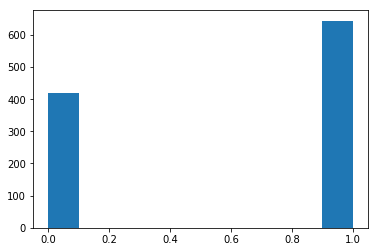

In [11]:
plt.hist(df['bod_class'])

In [12]:
def cluster_acc(y_true, y_predict):
    """
    Calculate clustering accuracy. 
    ----
    Arguments
        y_true: true labels, numpy.array with shape (n_samples,)
        y_predict: predicted labels, numpy.array with shape (n_samples,)
    ----
    Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_predict.shape[0] == y_true.shape[0]
    compare = y_true == y_predict
    accuarte, count = np.unique(comp, return_counts=True)
    total_evaluation = dict(zip(accuarte, count))
    return total_evaluation[True]/sum(total.values())
    


In [29]:
np.unique(df['Converged'], return_counts=True)

(array(['0', '1', '???'], dtype=object),
 array([   7, 1048,    8], dtype=int64))

In [77]:
cols=df.columns

In [78]:
cols

Index(['SMILES', 'value (% BOD)', 'Salt Stripped Molecule',
       'SMILES (Optimized Geometry)', 'Converged', 'Energy',
       'SMILES (RDKit Mol)', 'SlogP', 'SMR', 'LabuteASA',
       ...
       'MQN35', 'MQN36', 'MQN37', 'MQN38', 'MQN39', 'MQN40', 'MQN41', 'MQN42',
       'cleaned_bod', 'bod_class'],
      dtype='object', length=126)

In [33]:
sample_for_plot=df.sample(frac=0.2)

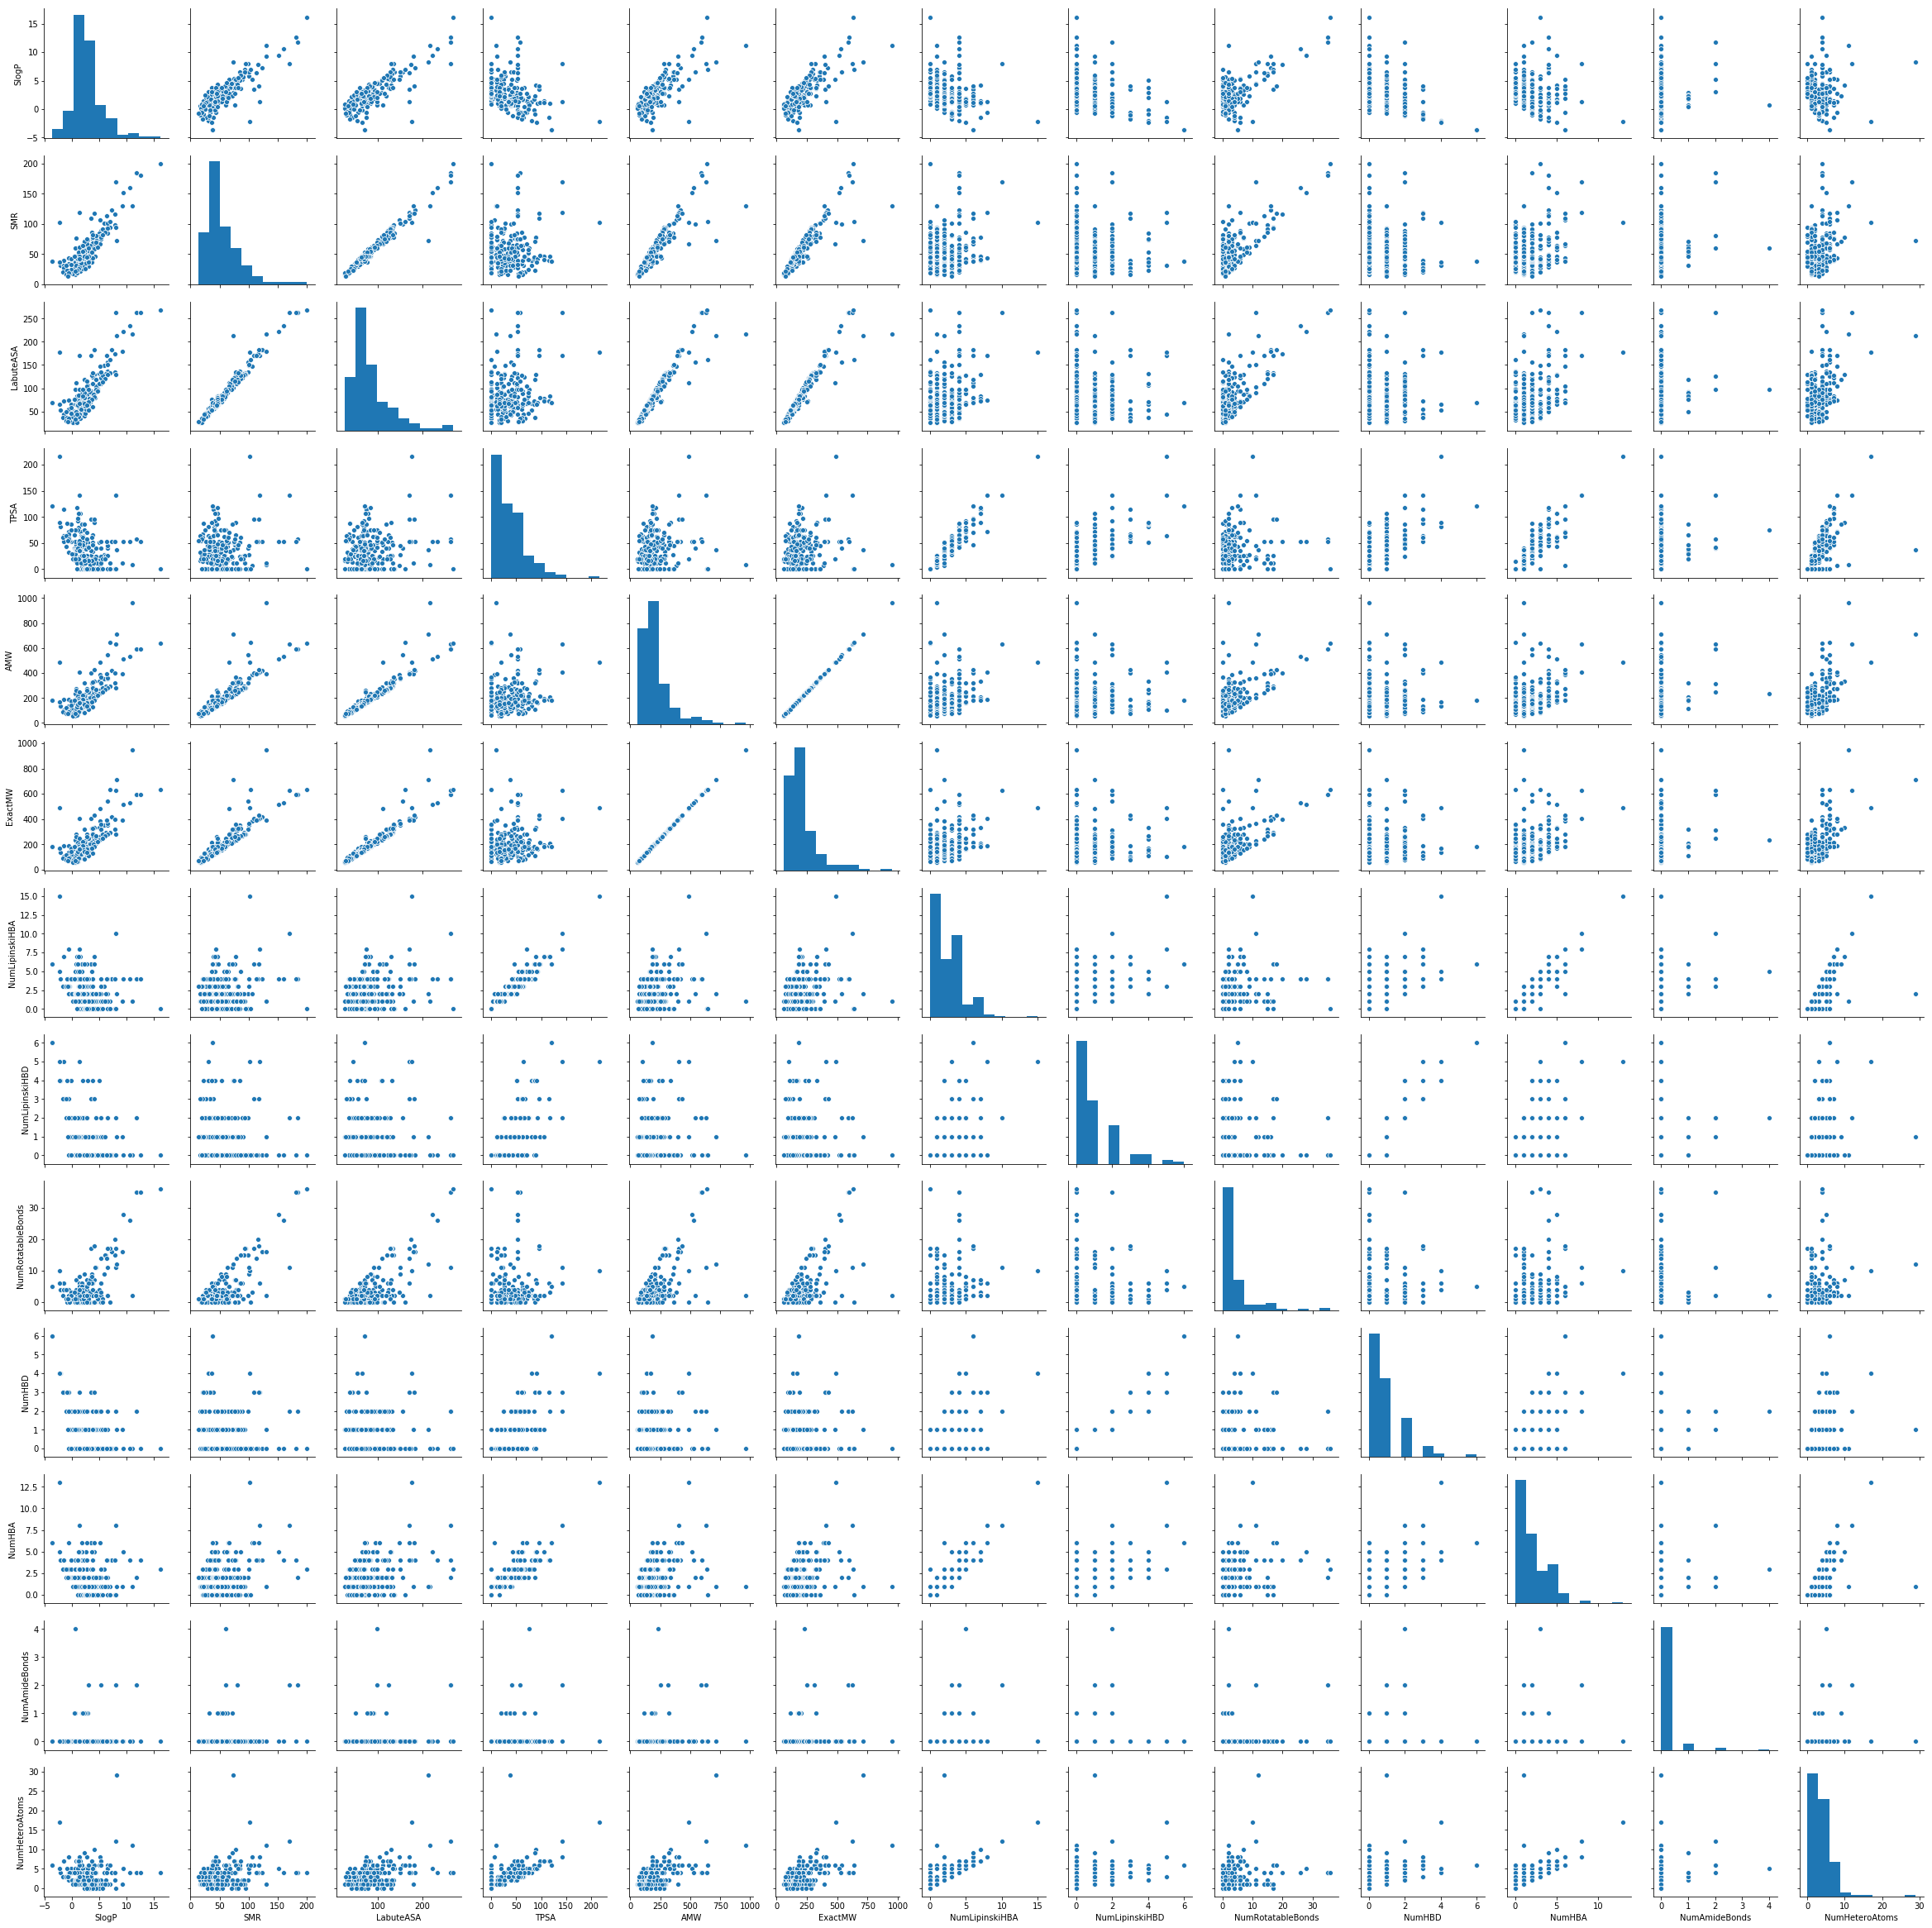

In [74]:
sns.pairplot(sample_for_plot[df.columns[5:20]])

In [83]:
cols[5:40].difference(cols[6:20])

Index(['Chi0v', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4v', 'Energy',
       'FractionCSP3', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings', 'NumAtoms',
       'NumHeavyAtoms', 'NumRings', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'NumSaturatedRings'],
      dtype='object')

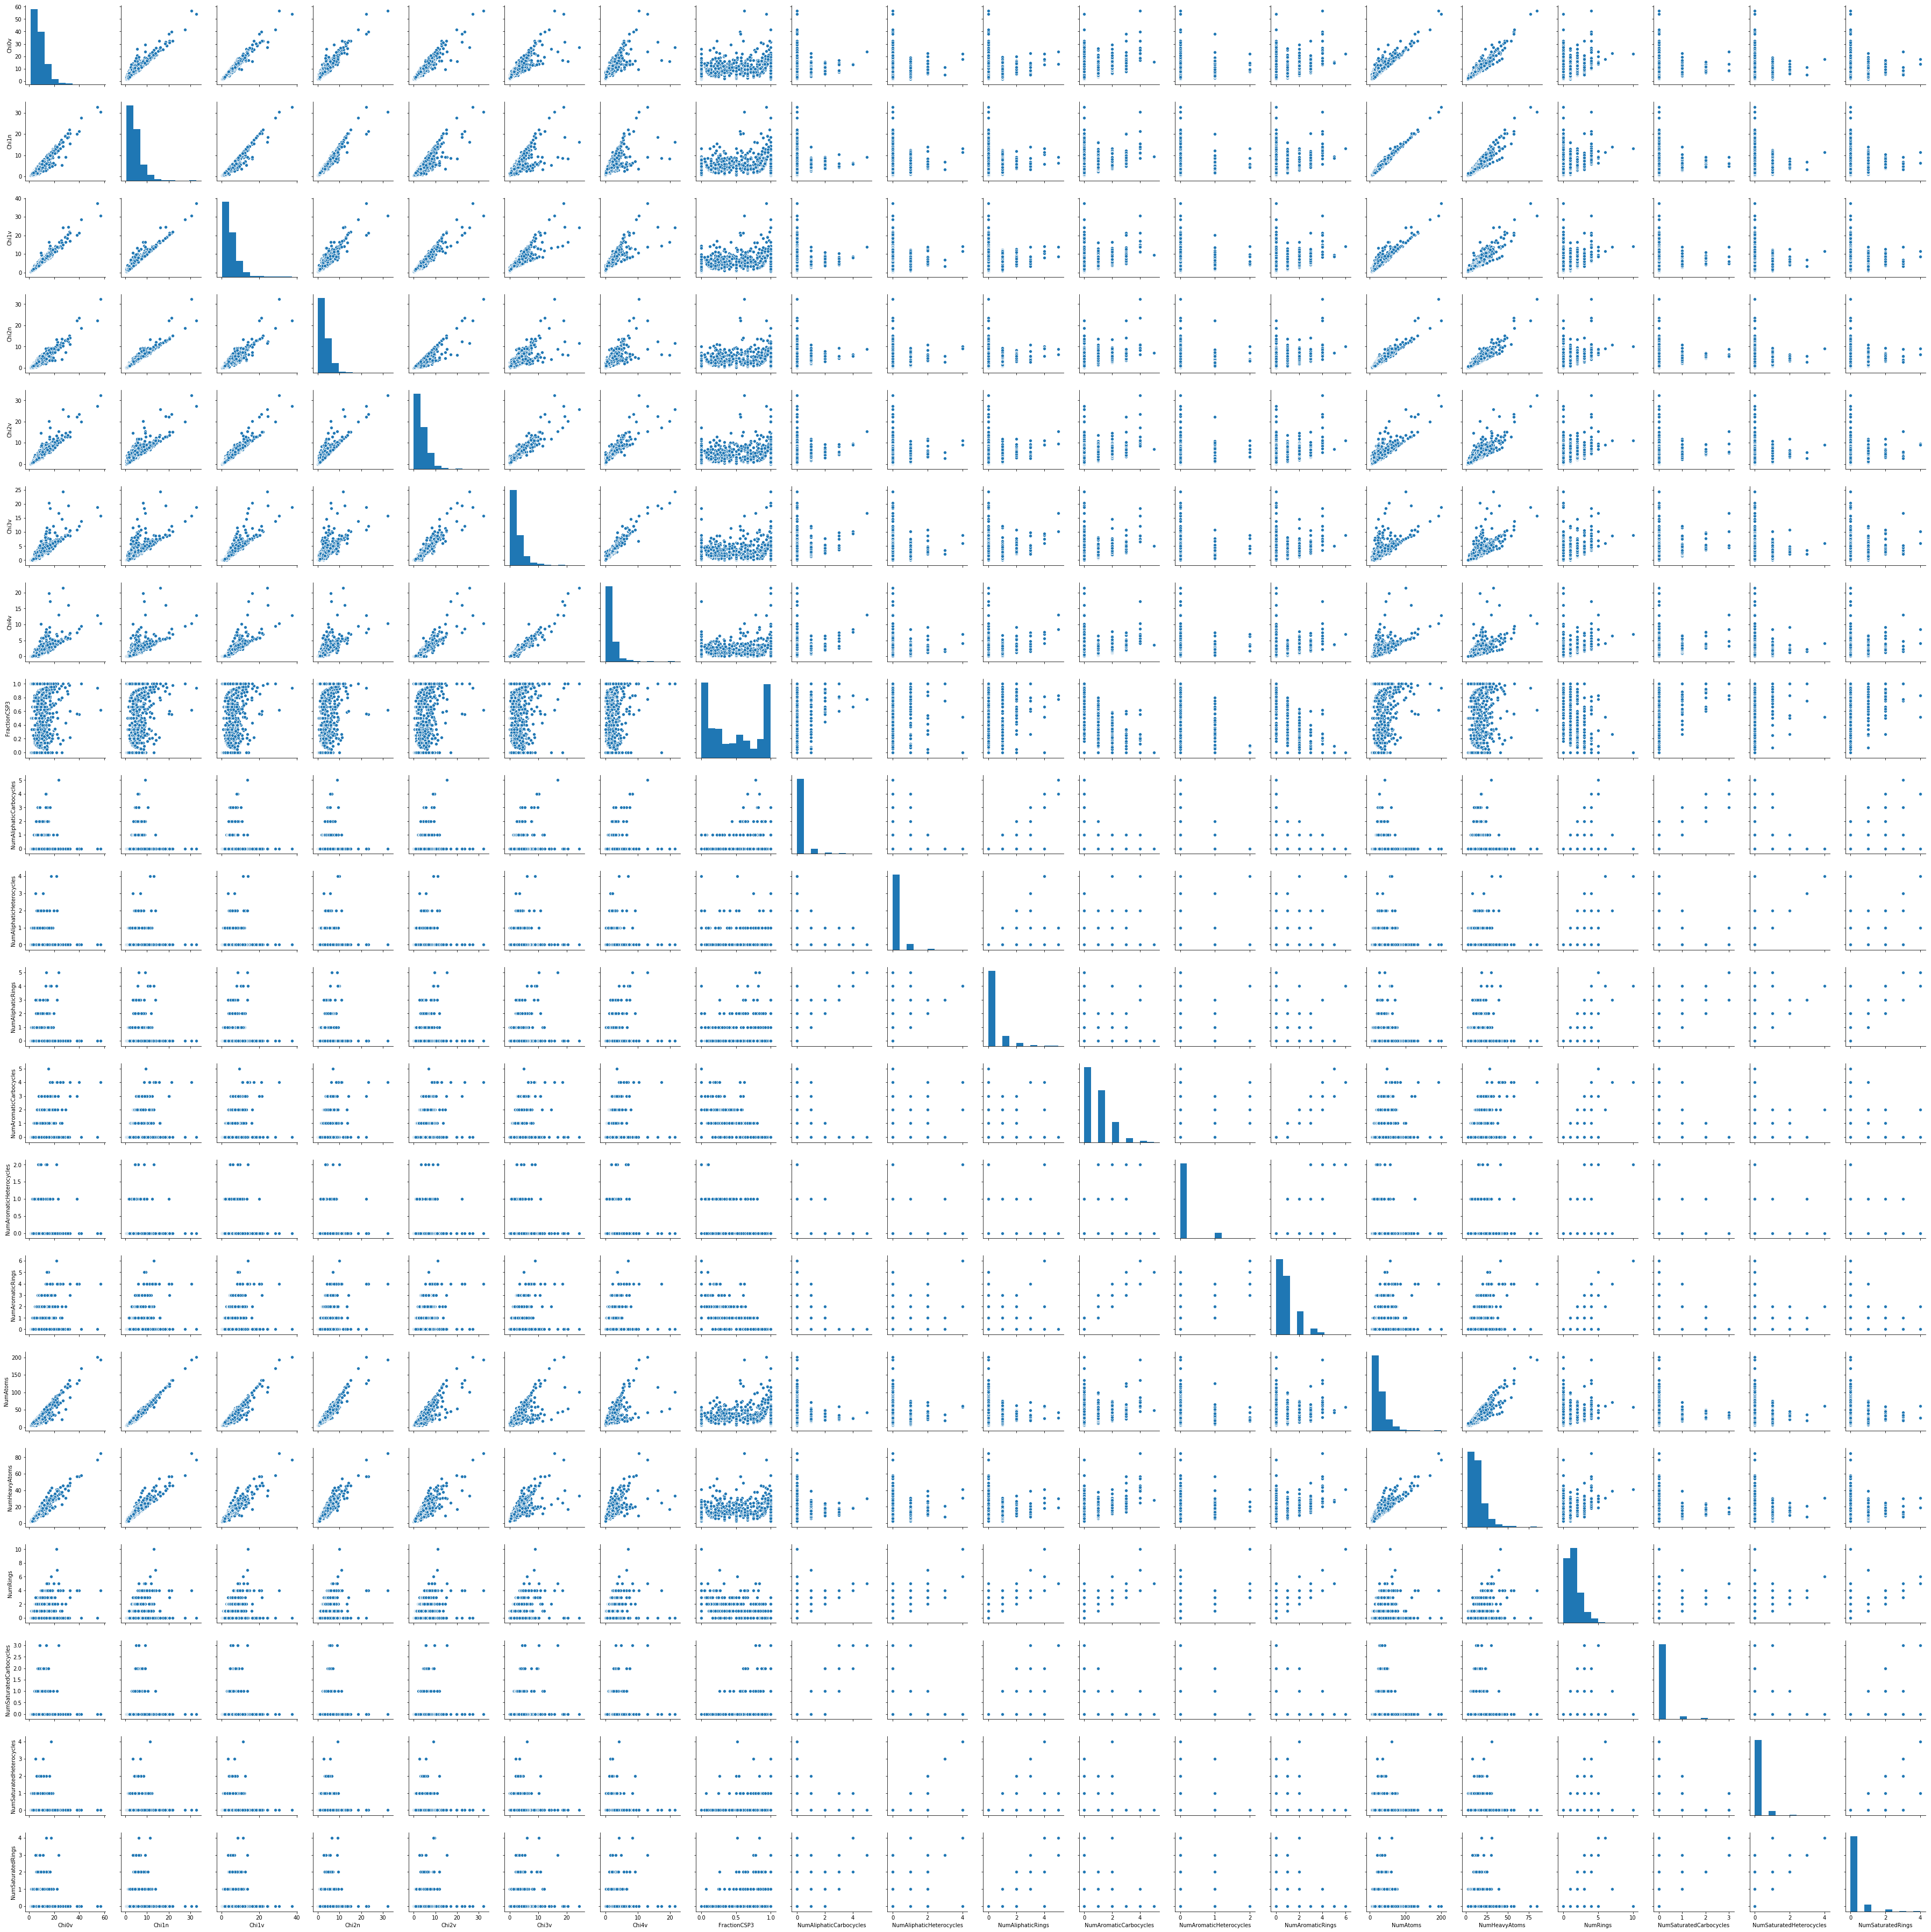

In [89]:
sns.pairplot(df[cols[5:40].difference(cols[6:20])])